### Convolutional Neural Network 

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
plt.style.use('seaborn-white')
import numpy as np
import warnings 
warnings.filterwarnings('ignore','DeprecatedWarnings')
warnings.filterwarnings('ignore','UserWarnings')

In [4]:
tf.__version__

'2.4.1'

### Loading DataSet

In [5]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), ( x_test, y_test) = mnist.load_data()

### View

Text(0.5, 1.0, 'label 7')

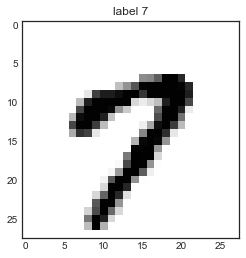

In [6]:
index = 15
plt.imshow(x_train[index],cmap='binary')
plt.title('label {}'.format(y_train[index]))

### Dimensions

In [7]:
print('X_train Dimension {}'.format(x_train.shape))
print('y_train Dimension {}'.format(y_train.shape)) # (val,1)
print('X_test Dimension {}'.format(x_test.shape))
print('y_test Dimension {}'.format(y_test.shape)) # (val,1)
print('Each Image HxW : {}x{}'.format(x_train[0].shape[0],x_train.shape[1]))

X_train Dimension (60000, 28, 28)
y_train Dimension (60000,)
X_test Dimension (10000, 28, 28)
y_test Dimension (10000,)
Each Image HxW : 28x28


### One-Hot Encoding the Target Labels

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape # one-hot encoded 10 dimensional vector

(60000, 10)

### Changing Dimensions

In [11]:
# current dimensions
print('Current Dimensions of Training Set : {}'.format(x_train.shape))
print('Current Dimensions of Test Set :  {}'.format(x_test.shape))

Current Dimensions of Training Set : (60000, 28, 28)
Current Dimensions of Test Set :  (10000, 28, 28)


In [12]:
x_train.shape[0]

60000

In [13]:
# Changing Dimensions to (60000, 28, 28, 1 ) # where 1 represents the color channel
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print('Changed Dimensions of Training Set {}'.format(x_train.shape))
print('Changed Dimensions of Test Set {}'.format(x_test.shape))

Changed Dimensions of Training Set (60000, 28, 28, 1)
Changed Dimensions of Test Set (10000, 28, 28, 1)


### Data Normalisation 

In [14]:
x_train = x_train.astype("float")/255.0
x_test = x_test.astype("float")/255.0

### Constructing the ConvNet Architecture

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape=x_train.shape[1:]))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [19]:
import time
start = time.perf_counter()
model.fit(x_train,y_train, epochs=5, validation_data=(x_test, y_test))

time_taken = time.perf_counter() - start
print('elapsed : {:.2f}'.format(time_taken/60))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2979 - accuracy: 0.9132 - val_loss: 0.0596 - val_accuracy: 0.9804
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0535 - accuracy: 0.9841 - val_loss: 0.0615 - val_accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0500 - val_accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0197 - accuracy: 0.9945 - val_loss: 0.0468 - val_accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.0519 - val_accuracy: 0.9845
elapsed : 0.97


In [20]:
history = pd.DataFrame(model.history.history)

In [21]:
history

,loss,accuracy,val_loss,val_accuracy
0,0.148471,0.956017,0.059566,0.9804
1,0.052131,0.984000,0.061468,0.9811
2,0.033199,0.989733,0.050020,0.9839
3,0.022586,0.993217,0.046791,0.9840
4,0.015001,0.995167,0.051869,0.9845


<AxesSubplot:title={'center':'Epochs-vs-Loss'}>

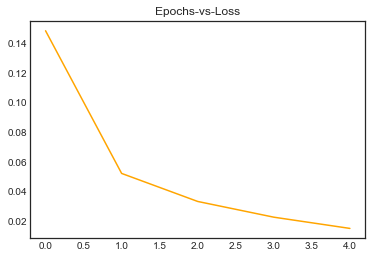

In [22]:
history['loss'].plot(title='Epochs-vs-Loss',color='orange')

<AxesSubplot:title={'center':'Epochs-vs-Accuracy'}>

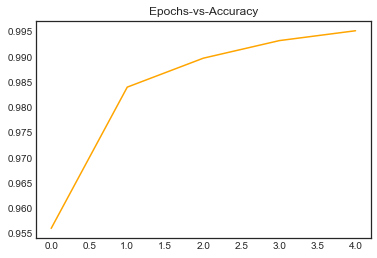

In [23]:
history['accuracy'].plot(title='Epochs-vs-Accuracy',color='orange')

<AxesSubplot:title={'center':'Epochs-vs-Validation Loss'}>

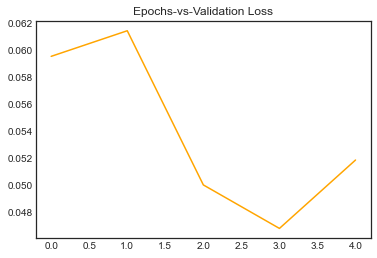

In [24]:
history['val_loss'].plot(title='Epochs-vs-Validation Loss',color='orange')

<AxesSubplot:title={'center':'Epochs-vs-Validation Loss'}>

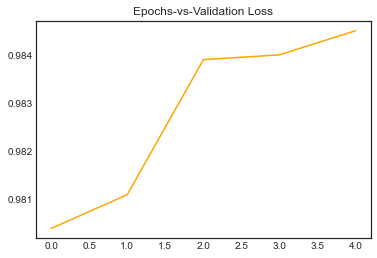

In [25]:
history['val_accuracy'].plot(title='Epochs-vs-Validation Loss',color='orange')

In [26]:
from sklearn.metrics import classification_report

In [27]:
predictions = model.predict_classes(x_test)
metric_report = classification_report(np.argmax(y_test,1),predictions)


/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
print(metric_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.95      1.00      0.97       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.96      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [29]:
epochs=5
train_acc = history['accuracy'][epochs-1]
test_acc = history['val_accuracy'][epochs-1]
train_acc *= 100
test_acc *= 100

In [30]:
print('Training Accuracy, last-epoch {:.2f}'.format(train_acc))
print('Testing Accuracy, last-epoch {:.2f}'.format(test_acc))

Training Accuracy, last-epoch 99.52
Testing Accuracy, last-epoch 98.45


### Evaluation

Text(0.5, 1.0, 'label - [6]')

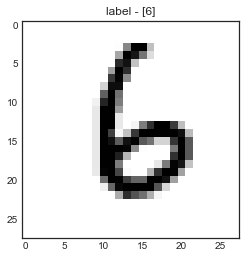

In [31]:
index = np.random.randint(1,10000,1)
random_sample = x_test[index]
label = np.argmax(y_test[index],1)
plt.imshow(random_sample.reshape(28,28),cmap='binary')
plt.title('label - {}'.format(label))

In [32]:
# Evaluating the predicted value
print('Model Thinks this is {}'.format(model.predict_classes(random_sample.reshape(1,28,28,1))[0]))
if label[0] == model.predict_classes(random_sample.reshape(1,28,28,1))[0]:
    print('Which is True')
else:
    print('It is incorrect')

Model Thinks this is 6
Which is True


### Miscellaneous

In [33]:
! ls ../../

MNIST                   pipeline.py             var-dict.txt
PipeLine Testing .ipynb sample_data.py
__init__.py             test.pt


In [34]:
# desc-----string
# project_name-----string
# framework-----string
# prediction_type-----string
# network_type-----string
# architecture-----string
# layers-----int
# hidden_units-----int
# activations-----string(list)
# epochs-----int
# metrics-----string
# train_accuracy-----float%
# test_accuracy-----float%
# classification_report-----string
# elapsed-----float
# summary-----string
# ipynb-----path
# plots-----path

In [35]:
summary = '''This implementation is slightly different that of the Pytorch's, in here there are only 5 layers with batch_size equal to the total X_train size which simply means that we are performing batchGD. Same as Pytorch's Version of the implementation, Even the Keras model slightly starts to overfit after the 2nd epoch in this case, but the difference is not prominent to be concerned with performance, the model is 98% accurate with unseen data.'''

In [36]:
summary

"This implementation is slightly different that of the Pytorch's, in here there are only 5 layers with batch_size equal to the total X_train size which simply means that we are performing batchGD. Same as Pytorch's Version of the implementation, Even the Keras model slightly starts to overfit after the 2nd epoch in this case, but the difference is not prominent to be concerned with performance, the model is 98% accurate with unseen data."

In [56]:
desc = 'The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.'
project_name = 'MNIST'
framework = 'Keras'
prediction_type = 'Multi-Class Classification - 10 Classes'
network_type = 'Convolutional Neural Network'
architecture = s
layers = 5
hidden_units = 'None'
activations = "['relu','softmax']"
epochs = 5
metrics = str(model.metrics_names)
loss = 'Categorical Cross-Entropy'
optimizer = 'Adam'
learning_rate = 'Alpha = 0.01'
batch_size = 'Total Data as a Batch'
train_accuracy = '{:.2f}'.format(train_acc)
test_accuracy = '{:.2f}'.format(test_acc)
classification_report = metric_report
elapsed = '{:.2f}'.format(time_taken/60) + ' Mins'
summary = summary
ipynb = './Projects/MNIST/Keras/MNIST-Keras.pdf'
plots = './Projects/MNIST/Keras/Plots'


In [57]:
s = '''Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
=================================================================
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________'''

In [58]:
var = ['desc','project_name', 'framework','prediction_type','network_type',
       'architecture','layers','hidden_units','activations','epochs',
       'metrics','loss','optimiser','learning_rate','batch_size','train_accuracy','test_accuracy','classification_report','elapsed','summary'
       ,'ipynb','plots']

In [59]:
param = {}
for val in var:
    
    try: 
        param[val] = eval(val)
    except:
        param[val] = val

In [63]:
param['optimiser'] = 'Adam'

In [64]:
 
import pickle
file = open("artefacts.txt", "wb") 
dictionary = param 
pickle.dump(dictionary, file) 
file.close() 

In [51]:
! ../../pipeline.py --state



preliminary - 

        * create - /Plots and save all the epoch-cycle plots 
        * create data for rendering # trail 
        
step - 1, use ../../pipline -varl with 1 to get the var-dict to show the variables to be filled with 
step - 2 - use the following snippet after fetching ../../pipeline -varl with 2 
    example: 
    var = ['desc','project_name', 'framework','prediction_type','network_type',
    'architecture','layers','hidden_units','activations','epochs',
    'metrics','train_accuracy','test_accuracy','classification_report','elapsed','summary'
    ,'ipynb','plots']
    param = {}
    for val in var:

        try: 
            param[val] = eval(val)

        except:
            param[val] = val
step - 3 - pickle dump 

    import pickle
    file = open("artefacts.txt", "wb") 
    dictionary = param 
    pickle.dump(dictionary, file) 
    file.close() 

step - 4 - ./pipeline.py -np 

    * relative path to the project ex - ./MNIST
    * choose framework 
    * done!
 
